# Zero deforestation mission

## Labels:

**0**: "Plantation". Network of rectangular plantation blocks.

**1**: "Grassland/Shrubland". Large homogeneous areas with few trees.

**2**: "Smallholder Agriculture": Small scale area, in wich you can find deforestation covered by agriculture.

In [99]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [100]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

display(df_test.head(2))

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png


In [101]:
def calc_ndvi(image):
    b, g, r = cv2.split(image)
    bottom = (r.astype(float) + b.astype(float))
    bottom[bottom==0] = 0.01
    ndvi = (b.astype(float) - r) / bottom
    return ndvi

In [102]:
# Process training data.
shape = (32, 32)
train_images = []
train_path = df_train["example_path"].to_numpy()

for filename in train_path:
    img = cv2.imread(filename)
    img = cv2.resize(img, shape)
    train_images.append(img)

train_images = np.array(train_images)
train_images.shape

(1714, 32, 32, 3)

In [103]:
# Process test data.
test_images = []
test_path = df_test["example_path"].to_numpy()

for filename in test_path:
    img = cv2.imread(filename)
    test_images.append(img)

test_images = np.array(test_images)
test_images.shape

(635, 332, 332, 3)

In [104]:
# train_images = train_images.reshape(1714, 110224)
# test_images = test_images.reshape(635, 110224)

Here we remove all the attributes for the data CSVs, so we only work with the label. (Currently).

We also convert 0 to [1 0 0], 1 to [0 1 0], and 2 to [0 0 1]. Therefore, we can translate the ML algorithm into a multiple binary classification problem.

In [105]:
df_train_label = df_train.pop("label")
df_train_label = pd.get_dummies(df_train_label).values

In [106]:
X_train, X_val, y_train, y_val = train_test_split(train_images, df_train_label, random_state=1234)

So now, we have:

**X_train**: Images for training. (TRAINING)

**X_val**: Images for validating the model. (VALIDATION)


**y_train**: Labels of the training images, so we can train. (TRAINING)

**y_val**: Labels of the validation set, so we can compare the results we predicted over X_val. (VALIDATION - F1 SCORE)


**test_images**: Like X_train or X_val, but for the final answer of the challenge (We don't know the labels).

In [107]:
#X_train_img = X_train.reshape([X_train.shape[0],32,32,3]).astype(float)

In [108]:
train_samples = X_train.shape[0]
val_samples = X_val.shape[0]

[0 0 1]


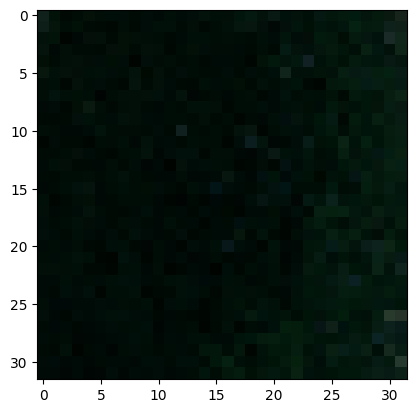

In [109]:
# Let's plot one of our examples.
print(df_train_label[5])
plt.imshow(train_images[5])

[1 0 0]


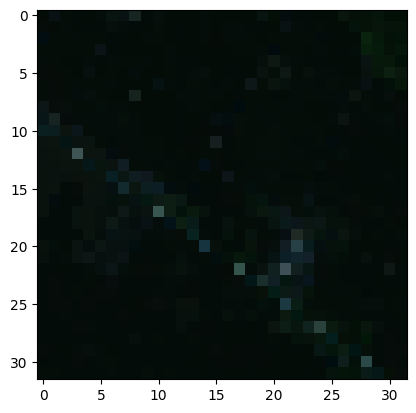

In [110]:
# Let's see a different one.
print(df_train_label[100])
plt.imshow(train_images[100])

In [119]:
# X_train = X_train.reshape(-1, 32, 32, 3)
# X_val = X_val.reshape(-1, 32, 32, 3)
X_train = (X_train-X_train.mean())/X_train.std()
display(X_train.shape)

(1285, 32, 32, 3)

In [115]:
model = Sequential()
model.add(Dense(3, input_dim=3072))
model.add(Activation('selu'))

In [116]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
# Training the model.
model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_split=0.02)
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/5


ValueError: in user code:

    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 3072 but received input with shape (None, 32, 32, 3)


In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined